# Weather data

### Meteo France

https://donneespubliques.meteofrance.fr/?fond=produit&id_produit=90&id_rubrique=32

date format : 'AAAAMMDDHHMISS'


In [4]:
import sys
sys.path.append('/home/philippe/code/plussou/runinlyon')

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from runinlyon.weather  import get_lat_lon, get_woeid, get_temperature_many_days

In [7]:
temp_df=pd.read_csv('../data/synop.202009.csv',sep=';')

In [8]:
temp_stex = temp_df[temp_df['numer_sta']==7481][['date','t']]
temp_stex['date']=pd.to_datetime(temp_stex['date'],format='%Y%m%d%H%M%S')
temp_stex['t'] = temp_stex['t'].astype(float)-273.15

In [18]:
temp_stex.set_index(keys='date',inplace=True)

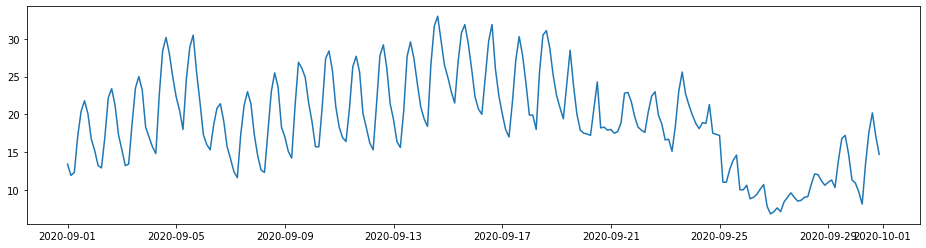

In [19]:
fig, ax = plt.subplots(figsize=(16,4))
ax.plot(temp_stex['t'],label='Lyon')

### metaweather API

In [14]:
adresse = "20 rue des capucins Lyon"
lat,lon = get_lat_lon(adresse)
woeid = get_woeid(lat,lon)

temp = get_temperature_many_days(woeid['woeid'],2020,9,1,2020,9,30)
temp_lyon = temp.resample('2H').mean().dropna()

In [20]:
ax.plot(temp_lyon.the_temp,color='grey',label='Lyon')

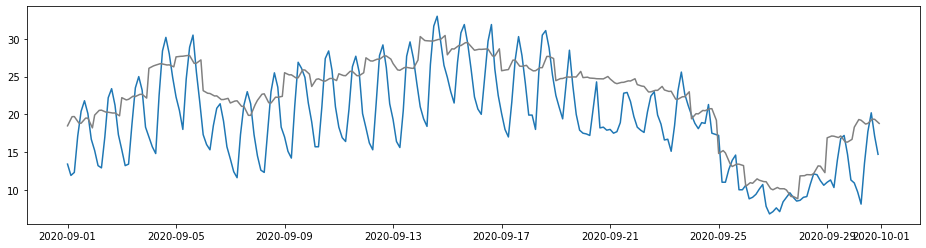

In [21]:
fig

### ENTPE

http://idmp.entpe.fr/mesfr.htm

In [39]:
temp_vlx = pd.read_csv('../data/vlx20QC_9.txt',skiprows=30,header=None,sep='\t')

In [45]:
temp_vlx['date']=pd.to_datetime(temp_vlx[0],format='%m/%d/%Y %H:%M')
temp_vlx['temp']=temp_vlx[16].astype(float)

In [47]:
temp_vlx.drop(columns=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],inplace=True)
temp_vlx.set_index(keys='date',inplace=True)

In [48]:
ax.plot(temp_vlx.temp,label='ENTPE')

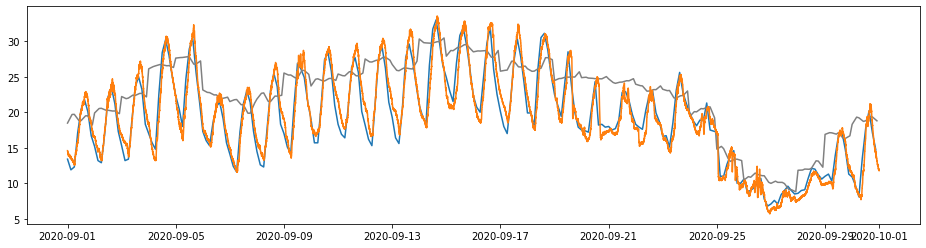

In [49]:
fig